In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding
     

In [3]:
# Define the neural network architecture
def create_model(hidden_units=None, activation=None): # flatten converts 3D to 1D
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation), # Hidden Layer 1
        Dense(hidden_units[1], activation=activation), # Hidden Layer 2
        Dense(hidden_units[2], activation=activation), # Hidden Layer 3
        Dense(10, activation='softmax')
    ])
    return model

In [4]:
# Define hyperparameters to test
hidden_units_list = [(512, 256, 128), (256, 128, 64), (1024, 512, 256)]
activation_list = ['relu', 'tanh', 'sigmoid']

In [5]:
results_dict = {}
counter = 1

# Loop through combinations of hidden units and activations
for hidden_units in hidden_units_list:
    for activation in activation_list:

        model = create_model(hidden_units=hidden_units, activation=activation)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

        _, test_acc = model.evaluate(x_test, y_test)

        model_info = { # Create a dictionary for the current iteration
            "Hidden units": hidden_units,
            "Activation": activation,
            "Test accuracy": round(test_acc * 100, 4)
        }

        results_dict[counter] = model_info  # Add the current dictionary to the results dictionary

        counter += 1

C:\Users\91702\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.2613 - loss: 2.0244 - val_accuracy: 0.3622 - val_loss: 1.8129
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3820 - loss: 1.7110 - val_accuracy: 0.4000 - val_loss: 1.6834
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4213 - loss: 1.6079 - val_accuracy: 0.4349 - val_loss: 1.5754
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4482 - loss: 1.5376 - val_accuracy: 0.4321 - val_loss: 1.5724
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4588 - loss: 1.5024 - val_accuracy: 0.4596 - val_loss: 1.5138
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4578 - loss: 1.5140
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.1985 - loss: 2.1672 - val_accuracy: 0.3066 - val_loss: 1.8979
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2855 - loss: 1.9320 - val_accuracy: 0.3163 - val_loss: 1.9119
Epoch 3/5
782/782 ━━━━

KeyboardInterrupt: 

In [8]:
# Print the entire results dictionary
for key, value in results_dict.items():
    print(f"Run {key}:")
    for info_key, info_value in value.items():
        print(f"{info_key}: {info_value}")
    print("- -" * 15)  # Dict prints Separator

print("\n")

# Find the run with the highest test accuracy
max_accuracy_run = max(results_dict, key=lambda k: results_dict[k]["Test accuracy"])
max_accuracy_info = results_dict[max_accuracy_run]

# Print details of the run with the highest test accuracy
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key, info_value in max_accuracy_info.items():
    print(f"{info_key}: {info_value}")

Run 1:
Hidden units: (512, 256, 128)
Activation: relu
Test accuracy: 45.96
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 2:
Hidden units: (512, 256, 128)
Activation: tanh
Test accuracy: 32.29
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 3:
Hidden units: (512, 256, 128)
Activation: sigmoid
Test accuracy: 40.48
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 4:
Hidden units: (256, 128, 64)
Activation: relu
Test accuracy: 42.89
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 5:
Hidden units: (256, 128, 64)
Activation: tanh
Test accuracy: 36.77
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 6:
Hidden units: (256, 128, 64)
Activation: sigmoid
Test accuracy: 39.61
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 7:
Hidden units: (1024, 512, 256)
Activation: relu
Test accuracy: 46.99
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 8:
Hidden units: (1024, 512, 256)
Activation: tanh
Test accuracy: 31.35
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


Run with the highest test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


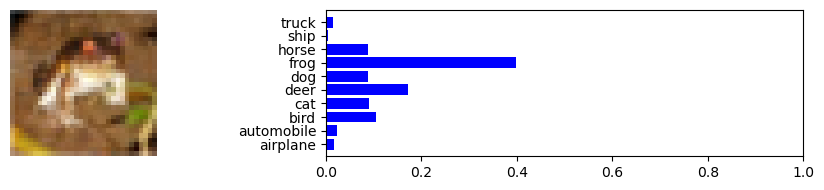

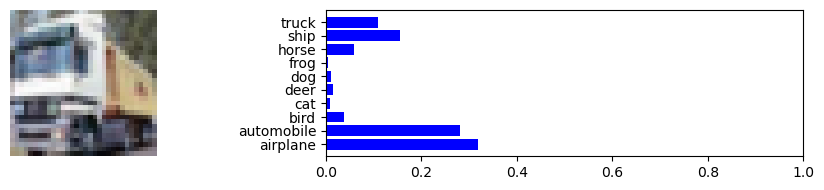

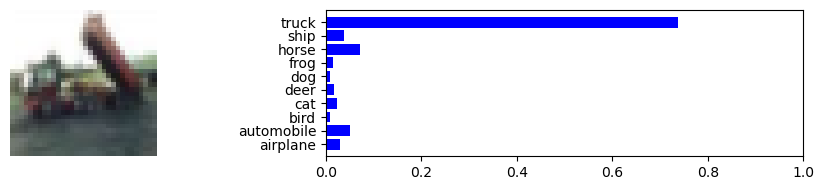

In [7]:
num_images = 3
sample_images = x_train[:num_images]
predictions = model.predict(sample_images)

def plot_probability_meter(predictions, image):
    class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    # Plot the image
    axs[0].imshow(image)
    axs[0].axis('off')

    # Plot the probability meter
    axs[1].barh(class_labels, predictions[0], color='blue')
    axs[1].set_xlim([0, 1])
    # axs[1].set_xlabel('Probability')

    plt.tight_layout()
    plt.show()

for i in range(num_images):
    plot_probability_meter(predictions[i:i+1], sample_images[i])